<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/CNNImagClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
#this is 2 dimensional array
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
#converting this array into 1d
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airplan","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[1]

'automobile'

In [8]:
# let's check the image at 0 index
def plot_sample(X,y,index):
  #to control the size of the image
  plt.figure(figsize=(15,2))
  #to show the image
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

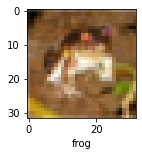

In [9]:
plot_sample(X_train,y_train,0)

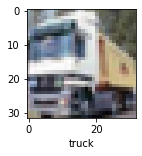

In [10]:
plot_sample(X_train,y_train,1)

In [11]:
#Now normalizing the data
X_train=X_train/255
X_test=X_test/255

In [12]:
#Now going to make the model
ann=models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
     layers.Dense(3000,activation="relu"),
     layers.Dense(1000,activation="relu"),
     layers.Dense(10,activation="sigmoid")
    ]
)
ann.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 10ms/step - loss: 2.0664 - accuracy: 0.3096
Epoch 2/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7202 - accuracy: 0.3864
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6570 - accuracy: 0.4132
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6210 - accuracy: 0.4266
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5979 - accuracy: 0.4329


In [13]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6991 - accuracy: 0.4009


[1.6991097927093506, 0.4009000062942505]

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
# y_pred_classes=np.argmax(y_pred, axis=1)
# y_test_classes=[np.argmax(element) for element in y_test]
print("Classification Report is \n ",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report is 
                precision    recall  f1-score   support

           0       0.63      0.28      0.39      1000
           1       0.53      0.51      0.52      1000
           2       0.41      0.12      0.18      1000
           3       0.29      0.40      0.33      1000
           4       0.44      0.30      0.35      1000
           5       0.47      0.21      0.29      1000
           6       0.36      0.60      0.45      1000
           7       0.67      0.31      0.42      1000
           8       0.49      0.54      0.51      1000
           9       0.30      0.77      0.43      1000

    accuracy                           0.40     10000
   macro avg       0.46      0.40      0.39     10000
weighted avg       0.46      0.40      0.39     10000



In [17]:
cnn=models.Sequential(
    [
      #cnn
      layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),#this is max pooling of 2 by 2
     layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
      layers.MaxPooling2D((2,2)),#this is max pooling of 2 by 2
      #dense
     layers.Flatten(),
     layers.Dense(64,activation="relu"),
     layers.Dense(10,activation="softmax")
    ]
)

In [18]:
cnn.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [19]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.5194 - accuracy: 0.4521
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1869 - accuracy: 0.5824
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0619 - accuracy: 0.6273
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9798 - accuracy: 0.6580
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9228 - accuracy: 0.6776
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8752 - accuracy: 0.6951
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8318 - accuracy: 0.7086
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7981 - accuracy: 0.7231
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7632 - accuracy: 0.7325
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.73

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9295 - accuracy: 0.6815


[0.929543137550354, 0.6815000176429749]

In [21]:
y_test[:5] #this is two dimesional array so convert it into 1d

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [22]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

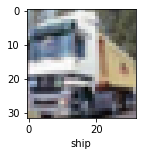

In [23]:
plot_sample(X_test,y_test,1)

In [24]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.6948681e-04, 1.3064235e-03, 6.0553644e-03, 8.1228000e-01,
        9.1760932e-04, 1.6255298e-01, 2.6145093e-03, 3.1859796e-05,
        1.0026230e-02, 3.7455887e-03],
       [2.5807456e-03, 5.4822145e-03, 5.4214947e-06, 5.9244849e-06,
        2.2035656e-09, 6.2030480e-08, 2.4430834e-08, 1.2440146e-08,
        9.9191731e-01, 8.2878050e-06],
       [7.2614299e-03, 3.6540350e-01, 5.0678855e-04, 2.2978445e-03,
        2.9527733e-05, 7.9022044e-05, 5.8345578e-04, 3.5765686e-05,
        6.1721534e-01, 6.5873349e-03],
       [9.3603343e-01, 1.8710379e-03, 2.5138576e-03, 6.8785698e-04,
        1.4744702e-04, 2.7727838e-05, 8.3851090e-05, 2.2090154e-04,
        5.7025142e-02, 1.3887753e-03],
       [2.5376295e-07, 9.1313123e-06, 3.5764635e-02, 4.3995492e-02,
        5.5526084e-01, 1.1078983e-02, 3.5386840e-01, 1.9633571e-05,
        2.1986134e-06, 4.5249874e-07]], dtype=float32)

In [25]:
#to get the maximum value index we will use aurgmax
y_pred_classes=[np.argmax(element) for element in y_pred]

In [27]:
y_pred_classes[:5]#predicted values

[3, 8, 8, 0, 4]

In [28]:
#actual values
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [29]:
print("Classification Report is \n ",classification_report(y_test,y_pred_classes))

Classification Report is 
                precision    recall  f1-score   support

           0       0.77      0.61      0.68      1000
           1       0.77      0.84      0.81      1000
           2       0.59      0.58      0.59      1000
           3       0.51      0.49      0.50      1000
           4       0.67      0.57      0.61      1000
           5       0.60      0.58      0.59      1000
           6       0.74      0.77      0.75      1000
           7       0.72      0.75      0.74      1000
           8       0.69      0.85      0.76      1000
           9       0.75      0.76      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

